In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
news_true = pd.read_csv(r'C:\Users\AnitaM\Downloads\Fake News Detection\True.csv')
news_fake = pd.read_csv(r'C:\Users\AnitaM\Downloads\Fake News Detection\Fake.csv')

news_true['label'] = 'True'
news_fake['label'] = 'Fake'

news_all = pd.concat([news_true, news_fake], 0)
news_all.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [3]:
print('The shape of the dataset is: ', news_all.shape)
news_all['label'].value_counts()

The shape of the dataset is:  (44898, 5)


Fake    23481
True    21417
Name: label, dtype: int64

In [4]:
print('The number of unique values and dtypes of each column is: \n')
for col in news_all.columns:
    print('The number of unique values in the column ', col, ' is ', news_all[col].nunique(), ' and dtype is : ', news_all[col].dtypes)

The number of unique values and dtypes of each column is: 

The number of unique values in the column  title  is  38729  and dtype is :  object
The number of unique values in the column  text  is  38646  and dtype is :  object
The number of unique values in the column  subject  is  8  and dtype is :  object
The number of unique values in the column  date  is  2397  and dtype is :  object
The number of unique values in the column  label  is  2  and dtype is :  object


In [5]:
# Check for any null values:
news_all.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [6]:
# Check for the words used in title of fake and True news and if any common words in both type of news uisng wordcloud:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# The word Trump can be used in stopword as it is most frequently occuring in both the news headlines.
stopwords.update(['Trump'])

(-0.5, 399.5, 199.5, -0.5)

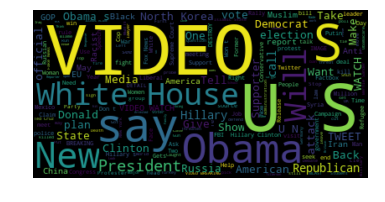

In [7]:
# For all news headlines:
all_headlines=' '.join(news_all['title'])
wordcloud = WordCloud(stopwords=stopwords).generate(all_headlines)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [8]:
# Video, US, White House, Obama, new, say, President are most frequently used words in all news headlines

(-0.5, 399.5, 199.5, -0.5)

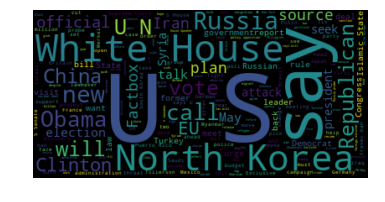

In [9]:
# For true news headlines:
true_headlines=' '.join(news_true['title'])
wordcloud = WordCloud(stopwords=stopwords).generate(true_headlines)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

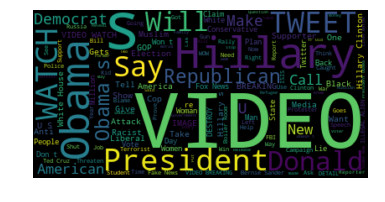

In [10]:
# For fake news headlines:
fake_headlines=' '.join(news_fake['title'])
wordcloud = WordCloud(stopwords=stopwords).generate(fake_headlines)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [11]:
# Explore the news using wordcloud and check the sentiment of the news:

In [12]:
stopwords.update(['said']) # Updating the stopwords with said as it frequently occurs in both

(-0.5, 399.5, 199.5, -0.5)

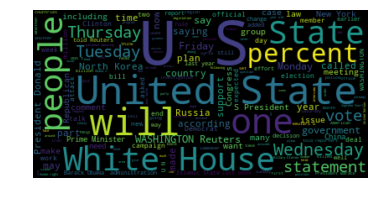

In [13]:
# For true news:
true_news=' '.join(news_true['text'])
wordcloud = WordCloud(stopwords=stopwords).generate(true_news)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

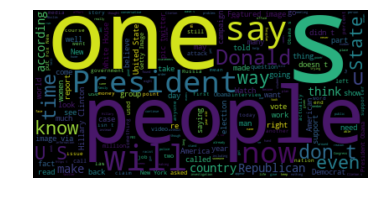

In [14]:
# For fake news:
fake_news=' '.join(news_fake['text'])
wordcloud = WordCloud(stopwords=stopwords).generate(fake_news)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [15]:
# Checking sentiments of the news:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [16]:
# For true news:
Sentiment=[]
for news in news_true['text']:
    vs = analyzer.polarity_scores(news) 
    
    if vs['pos'] > vs['neg']:
        pos_neg = 'Positive'
    if vs['neg'] > vs['pos']:
        pos_neg = 'Negative'
    Sentiment.append(pos_neg)
    
news_true['news_sentiment'] = pd.Series(Sentiment)

news_true['news_sentiment'].value_counts()

Positive    11826
Negative     9591
Name: news_sentiment, dtype: int64

In [17]:
# For fake news:
Sentiment=[]
for news in news_fake['text']:
    vs = analyzer.polarity_scores(news) 
    
    if vs['pos'] > vs['neg']:
        pos_neg = 'Positive'
    if vs['neg'] > vs['pos']:
        pos_neg = 'Negative'
    Sentiment.append(pos_neg)
    
news_fake['news_sentiment'] = pd.Series(Sentiment)

news_fake['news_sentiment'].value_counts()

Negative    12422
Positive    11059
Name: news_sentiment, dtype: int64

In [18]:
# Negative sentiment news counts is more for fake news than true news

In [19]:
news_all['news_sentiment'] = pd.concat([news_true['news_sentiment'], news_fake['news_sentiment']], 0)
news_all.head()

,title,text,subject,date,label,news_sentiment
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,Positive
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,Positive
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,Negative
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,Negative
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,Positive


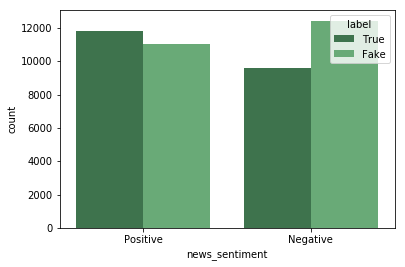

In [20]:
sns.countplot(x='news_sentiment', data=news_all ,hue='label',palette="Greens_d")

In [21]:
# Check the word counts in fake and true news:

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation
stop_words = set(STOPWORDS)
stop_words.update(list(punctuation))
lemma = WordNetLemmatizer()

def split_into_lemmas(message):
    message=message.lower()
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in stop_words:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [22]:
for i in range(len(news_true)):
    news_true_lemma = split_into_lemmas(news_true['text'][i])
    news_true.loc[i,'word_count_news'] = len(str(news_true_lemma).split())

In [23]:
for i in range(len(news_fake)):
    news_fake_lemma = split_into_lemmas(news_fake['text'][i])
    news_fake.loc[i,'word_count_news'] = len(str(news_fake_lemma).split())

In [24]:
news_true['word_count_news'].describe()

count    21417.000000
mean       242.827847
std        172.105052
min          1.000000
25%         93.000000
50%        225.000000
75%        326.000000
max       2726.000000
Name: word_count_news, dtype: float64

In [25]:
news_fake['word_count_news'].describe()

count    23481.000000
mean       244.581662
std        241.466853
min          1.000000
25%        140.000000
50%        208.000000
75%        291.000000
max       5041.000000
Name: word_count_news, dtype: float64

In [26]:
# Mean of word is some what similar for both true and fake news but the max word count is for fake news

In [27]:
news_all['word_count_news'] = pd.concat([news_true['word_count_news'], news_fake['word_count_news']], 0)

In [28]:
news_all.head()

,title,text,subject,date,label,news_sentiment,word_count_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,Positive,499.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,Positive,414.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,Negative,289.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,Negative,247.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,Positive,524.0


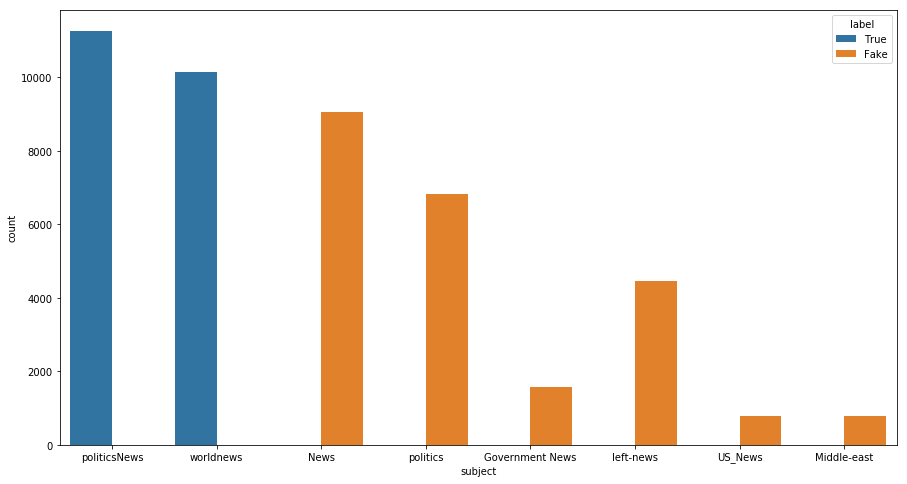

In [29]:
plt.figure(figsize=[15,8])
sns.countplot(x='subject', data=news_all, hue='label')
plt.show()

In [30]:
news_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [31]:
news_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [32]:
# The categories politics,politicsnews and Government News from fake and true news can be grouped together under plotics.
# worldnews and news are grouped under news.
# Maximum fake news are under general news category

In [33]:
news_all.reset_index(drop=True, inplace=True)

In [34]:
# There are some unknown type string values in the date column:
print(news_all[news_all['date'].str.len() > 19])

                                                   title  \
30775  https://100percentfedup.com/served-roy-moore-v...   
36924  https://100percentfedup.com/video-hillary-aske...   
36925  https://100percentfedup.com/12-yr-old-black-co...   
37256  https://fedup.wpengine.com/wp-content/uploads/...   
37257  https://fedup.wpengine.com/wp-content/uploads/...   
38849  https://fedup.wpengine.com/wp-content/uploads/...   
38850  https://fedup.wpengine.com/wp-content/uploads/...   
40350                                           Homepage   
43286  https://fedup.wpengine.com/wp-content/uploads/...   
43287  https://fedup.wpengine.com/wp-content/uploads/...   

                                                    text          subject  \
30775  https://100percentfedup.com/served-roy-moore-v...         politics   
36924  https://100percentfedup.com/video-hillary-aske...         politics   
36925  https://100percentfedup.com/12-yr-old-black-co...         politics   
37256  https://fedup.wpengine.c

In [35]:
# all of these unknowns string in date is present for fake news; and only fews rows so dropping them.

In [36]:
index_labels = news_all[news_all['date'].str.len() > 19].index
print(news_all.shape)
news_all.drop(index_labels, axis=0, inplace=True)
news_all.shape

(44898, 7)


(44888, 7)

In [37]:
# Converting date data to datetime type and extract month, year and weekday value:
news_all['date'] = pd.to_datetime(news_all['date'], infer_datetime_format=True)

news_all['date_month'] = pd.DatetimeIndex(news_all['date']).month
news_all['date_year'] = pd.DatetimeIndex(news_all['date']).year
news_all['date_weekday'] = pd.DatetimeIndex(news_all['date']).weekday

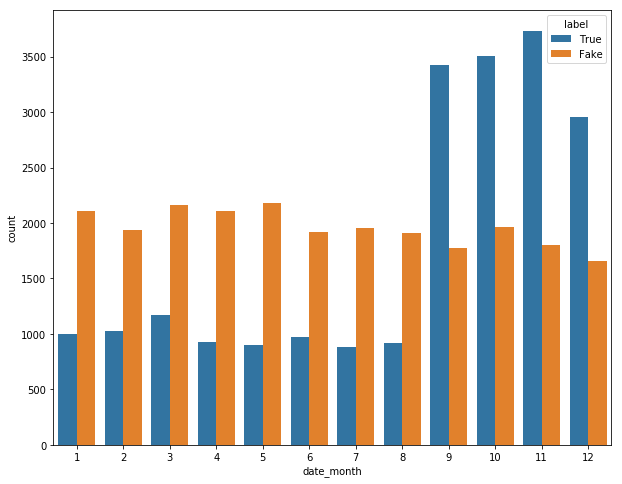

In [38]:
plt.figure(figsize=[10,8])
sns.countplot(x='date_month', data=news_all, hue='label')
plt.show()

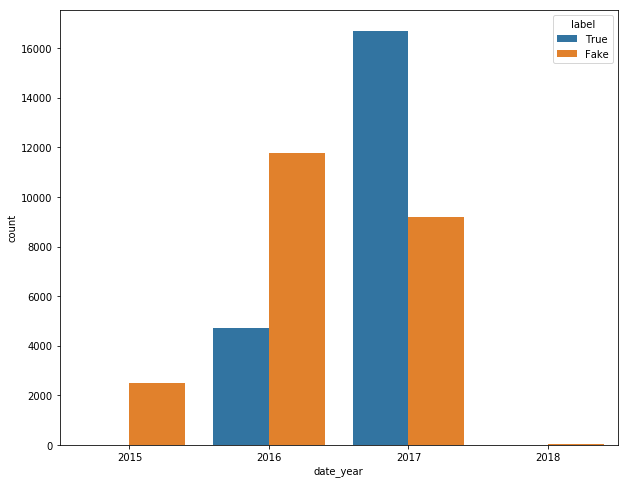

In [39]:
plt.figure(figsize=[10,8])
sns.countplot(x='date_year', data=news_all, hue='label')
plt.show()

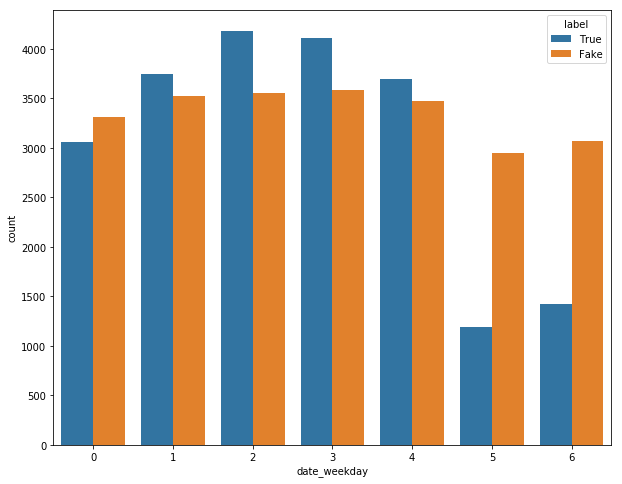

In [40]:
plt.figure(figsize=[10,8])
sns.countplot(x='date_weekday', data=news_all, hue='label')
plt.show()

In [41]:
# The count of true news increased towards the end of year while the count of fake news remained similar throughout
# The dataset containes true news for 2017 and 2016
# True news is very low as compared to fake ones during the weekends
# Weekdays and month information from the date can be extracted for building models 

In [45]:
# Grouping the subject categories:
news_all.reset_index(drop=True, inplace=True)

for i in range(len(news_all)):
    if news_all['subject'][i] in ['politics', 'politicsNews', 'Government News']:
        news_all.loc[i, 'subject'] = 'politics'
    if news_all['subject'][i] in ['worldnews', 'News']:
        news_all.loc[i, 'subject'] = 'news'        

In [46]:
news_all.head()

,title,text,subject,date,label,news_sentiment,word_count_news,date_month,date_year,date_weekday
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics,2017-12-31,True,Positive,499.0,12,2017,6
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics,2017-12-29,True,Positive,414.0,12,2017,4
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics,2017-12-31,True,Negative,289.0,12,2017,6
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics,2017-12-30,True,Negative,247.0,12,2017,5
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics,2017-12-29,True,Positive,524.0,12,2017,4


In [47]:
news_all['subject'].value_counts()

politics       19676
news           19195
left-news       4456
US_News          783
Middle-east      778
Name: subject, dtype: int64

In [48]:
# Clustering using K-means : using word_counts and label of the news:

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [49]:
# Shuffle the data:
from sklearn.utils import shuffle

news_all = shuffle(news_all, random_state=2)
print(news_all.shape)
news_all.head()

(44888, 10)


,title,text,subject,date,label,news_sentiment,word_count_news,date_month,date_year,date_weekday
33875,CALIFORNIA PROTESTS HEAT UP: Students Walk Out...,Thousands of students from Berkeley High Scho...,politics,2016-11-09,Fake,Negative,105.0,11,2016,2
16141,"Spain's prosecutor calls for rebellion, sediti...",MADRID (Reuters) - Spain s state prosecutor on...,news,2017-10-30,True,Negative,42.0,10,2017,0
42992,POP STAR ARIANA GRANDE SAYS: “I hate Americans...,It s interesting how many of these celebrities...,left-news,2015-07-08,Fake,Negative,163.0,7,2015,2
19232,UNHCR chief meets with Rohingya refugees in Ba...,"KUTAPALONG, Bangladesh (Reuters) - The head of...",news,2017-09-23,True,Negative,266.0,9,2017,5
22746,Trump Has Finally Commented On Portland Train...,Donald Trump doesn t particularly have a filte...,news,2017-05-30,Fake,Negative,323.0,5,2017,1


In [61]:
news_sub1 = news_all[['word_count_news', 'label']]
news_sub1.reset_index(drop=True, inplace=True)
news_sub1['label'] = np.where(news_sub1['label']=='True',1,0)
news_sub1.head()

,word_count_news,label
0,105.0,0
1,42.0,1
2,163.0,0
3,266.0,1
4,323.0,0


In [62]:
news_sub1=pd.DataFrame(scale(news_sub1),columns=list(news_sub1.columns))
news_sub1.head()

,word_count_news,label
0,-0.657088,-0.955242
1,-0.955339,1.046855
2,-0.382508,-0.955242
3,0.105108,1.046855
4,0.374954,-0.955242


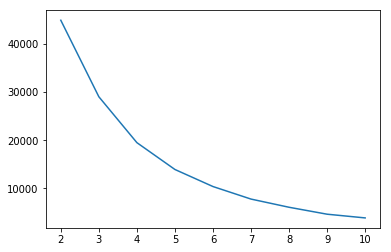

In [63]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
ssw=[]
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(news_sub1)
    ssw.append(kmeans.inertia_)
plt.plot(range_n_clusters,ssw)

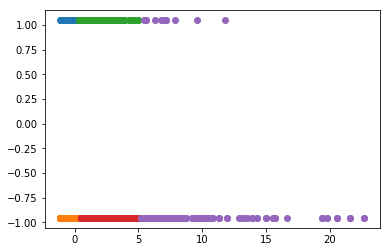

In [64]:
# elbow point at k=5
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(news_sub1)

labels = kmeans.labels_
news_sub1['cluster']=labels

for i in range(k):
    # select only data observations with cluster label == i
    ds = news_sub1[news_sub1['cluster']==i].to_numpy()
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')

plt.show()

In [65]:
# Checking with DBScan:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(news_sub1)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

Estimated number of clusters: 6


NameError: name 'X' is not defined

In [66]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(news_sub1, labels))

news_sub1['cluster_dbscan']=labels
news_sub1.head()

Estimated number of clusters: 6
Silhouette Coefficient: 0.771


,word_count_news,label,cluster,cluster_dbscan
0,-0.657088,-0.955242,1,0
1,-0.955339,1.046855,0,1
2,-0.382508,-0.955242,1,0
3,0.105108,1.046855,0,1
4,0.374954,-0.955242,1,0


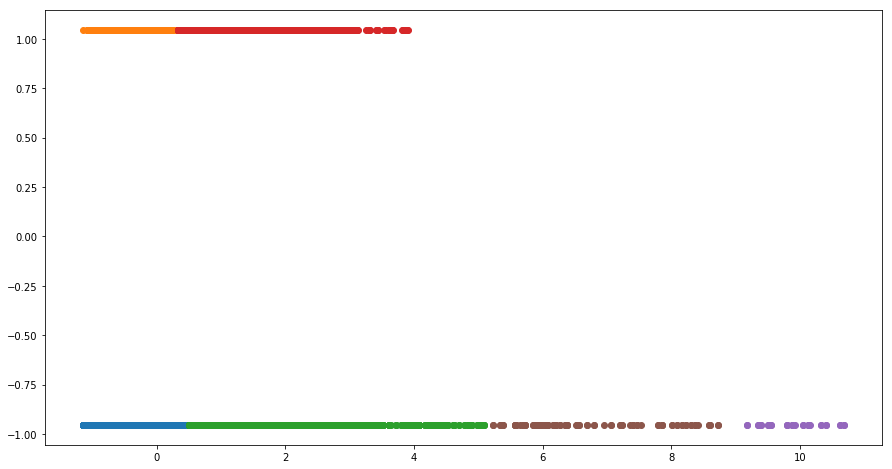

In [69]:
plt.figure(figsize=[15,8])

for i in range(6):
    ds = news_sub1[news_sub1['cluster_dbscan']==i].to_numpy()
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    
plt.show()

In [71]:
news_all['clusters_with_wordCount_label'] = news_sub1['cluster_dbscan']

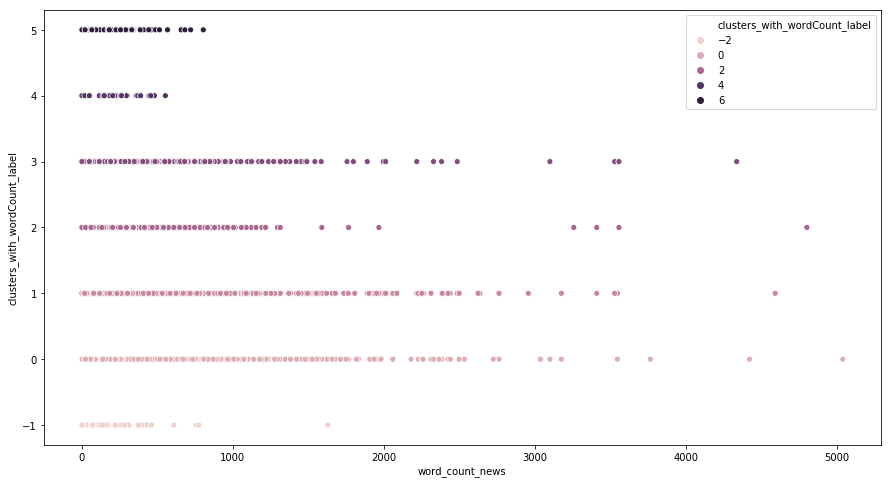

In [72]:
plt.figure(figsize=[15,8])
sns.scatterplot(x='word_count_news', y='clusters_with_wordCount_label', hue='clusters_with_wordCount_label',
                data=news_all)
plt.show()

In [73]:
# The mean word counts fall under -1, 4 and 5 cluster labels

In [74]:
# K-modes clustering : using subject and labels 
from kmodes.kmodes import KModes

In [75]:
news_sub2 = news_all[['subject', 'label']]

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 3, verbose=1)
    kmode.fit_predict(news_sub2)
    cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 46629.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26339.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17289.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6017.0


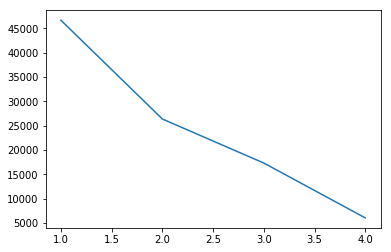

In [76]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [77]:
k=2
km = KModes(n_clusters=2, init='Cao', n_init=3, verbose=1)

clusters = km.fit_predict(news_sub2)

# Print the cluster centroids
print(km.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26339.0
[['politics' 'Fake']
 ['news' 'True']]


Text(0,0.5,'Cluster Labels')

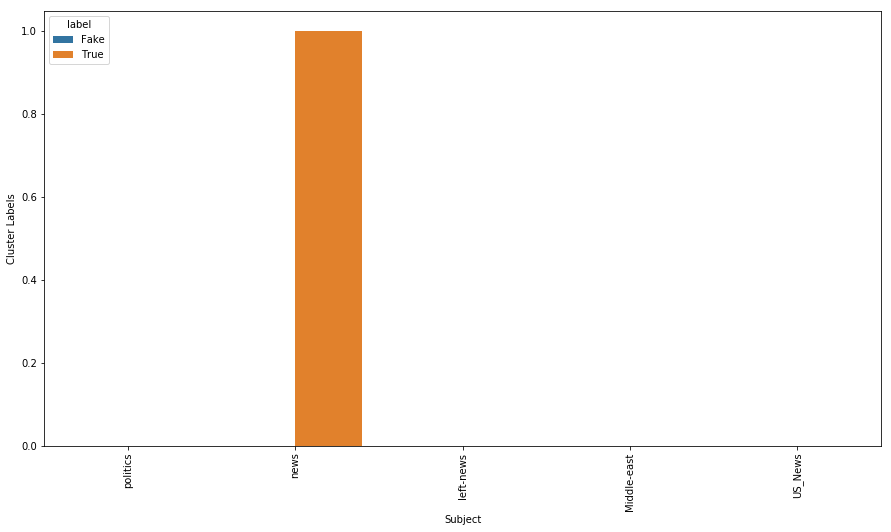

In [79]:
news_sub2['cluster_kmodes'] = km.labels_
plt.figure(figsize=[15,8])
sns.barplot(x='subject', y='cluster_kmodes', hue='label', data=news_sub2)
plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('Cluster Labels')

In [80]:
# Subject : News (True) is cluster under label 1 and rest other subject news are clustered under label 0.